# Laboratorium przetwarzania obrazów i grafiki komputerowej

## Sesja 5 - Obrazy 3D. Elementy grafiki komputerowej

### Łódź 2017

#### Marek Kociński

### Zadania do wykonania

#### 1. Dane do pracy podczas laboratrium

Ze [strony domowej przedmiotu](http://www.eletel.p.lodz.pl/med/pl/index.php?option=com_jotloader&view=categories&cid=99_b3c1de9aa6c8258566cc1b3370d1e750&Itemid=346) pobierz plik *lab5_dane.zip*. Plik zapisz **w swoim katalogu roboczym** na dysku *D:\ *, a następnie rozpakuj. Użyj programu *7zip* lub polecenia systemowego *Wyodrębnij wszystkie...*.

#### 2. Importowanie bibliotek systemowych

Zaimportuj wszystkie pakiety systemowe, które będą wykorzystywane podczas wykonywania ćwiczenia.

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

#### 3. Wybór metody wyświetlania obrazów

Podczas wykonywania ćwiczenia sugerowana jest wyświetlanie wyników **w oknach zewnętrznych**.

In [2]:
# wyświetlanie w osobnym, niezależnym oknie
#%matplotlib qt
# wyświetlanie wewnątrz dokumentu
%matplotlib inline

#### 4. Importowanie bibliotek własnych

Jeżeli korzystasz z własnych modułów lub pakietów również trzeba ja dołączyć.

Do ponownego zaimportowania modułu nie wystarczy ponowne użycie słowa kluczowego *import* wraz z nazwą modułu. Trzeba "wymusić" ponowne załadowanie klas, funkcji, zmiennych zdefionowanych w utworzonej wcześniej bibliotece za pomocą runkcji *reload()*.

Uwaga! Moduły *poigk_lab1.py* oraz *poigk_lab2.py* zostały napisane przez prowadzącego zajęcia i nie są dostępne na komputerach Studenckich. W trackie zajęć można zapisać tworzone funkcje we własnych modlułach w celu ich późniejszego, wielokrotnego wykorzystania. Nie należy importować pakietu *poigk_lab1* i *poigk_lab2*  podczas pracy na laboratoriach.

In [3]:
import poigk_lab1 as poigk1
import poigk_lab2 as poigk2
import poigk_lab3 as poigk3

**UWAGA** W poniższej komórce zostaną zdefiniowane wszystkie obrazy (zrzuty z ekranu), które będą wyświetlane w dalszej części instrukcji. Proszę nie przepisywać ani nie wykonywać tej komórki.

In [4]:
from IPython.display import Image
imagej_slices = Image(filename='obrazy_2017/lab5_imagej-slice-3d.png')
vtk_model = Image(filename='obrazy_2017/lab5_vtk_model.png')
itksnap1 = Image(filename='obrazy_2017/lab5_itksnap1.png')
itksnap2 = Image(filename='obrazy_2017/lab5_itksnap2.png')
itksnap3 = Image(filename='obrazy_2017/lab5_itksnap3.png')
paraview = Image(filename='obrazy_2017/lab5_paraview.png')

#### 5. Wczytanie i wyświetlenie obrazu z pliku dyskowego

Wczytaj obraz *normal01.nii.gz* z katalogu z danymi, w tym celu użyj funkcji *load()* z biblioteki *nibabel*. Plik z danymi jest w formacie [NIFTI](https://nifti.nimh.nih.gov/). Ten typ danych umożliwia zapis danych medycznych 2D, 3D i 4D. Bardzo wygodny sposób manipulacji plikami NIFTI zapewnia biblioteka [nibabel](http://nipy.org/nibabel/).

Funkcja *load()* wczytuje strukturę  NIFTI, która składa się z części nagłówkowej (*hdr*) oraz z danych. Aby uzysać dane musimy dodatkowo na strukturze *hdr* wywołać metodę *get_data()*.

Zachowaj kopie obrazu wczytanego (oryginalnego) w zmiennej *img_wczyt*.

In [5]:
# pliki z obrazami RGB dostępne w katalogu z danymi do laboratorium nr 5 (lab5_dane)

# normal01.nii.gz

filename = 'normal01'
filenameext = filename + '.nii.gz'
pathtofile = os.path.join('lab5_dane',filenameext)
im_hdr = nib.load(pathtofile)
im_data = im_hdr.get_data()

im_wczyt = im_data.copy()

Wypisz informacje zawarte w nagłówku wczytanego pliku. Spróbuj zinterpretować pewne pola w strukturze nagłówka.

In [6]:
print im_hdr

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : angio3d-nibabel 1.3.0
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b     

Spróbuj wypisać informacje o zmiennej *im_data*. Czy zadziała funkcja *imginfo()* pomimo faktu, że *im_data* wskazuje w pamięci komputera na obraz 3D? Jeśli zadziała, to wyjaśnij dlaczego.

In [7]:
poigk1.imginfo(im_data, 'dane 3d')

info o DANE 3D: min=0.00, aver=0.61,  max=255.00, shape=(256L, 256L, 256L), dtype=uint8


Zwróć uwagę na małą wartość średnią obrazu. Jak to zinterpretować?

Jak można zwizualizować wczytany obraz? Czy można go jakoś wyświetlić?

Na pewno można wyświetlić pojedynczy (wybrany) przekrój (np. 128) oraz histogram obrazu. Dlaczego w histogramie widać tylko jeden prążek jasności? Czy nie znajdują się piksele o innych poziomach jasności? Zwróć uwagę na wartości najmniejszą oraz największą w macierzy obrazu. Powiększ wybrany fragment histogramu i sprawdź liczność innych jasności.

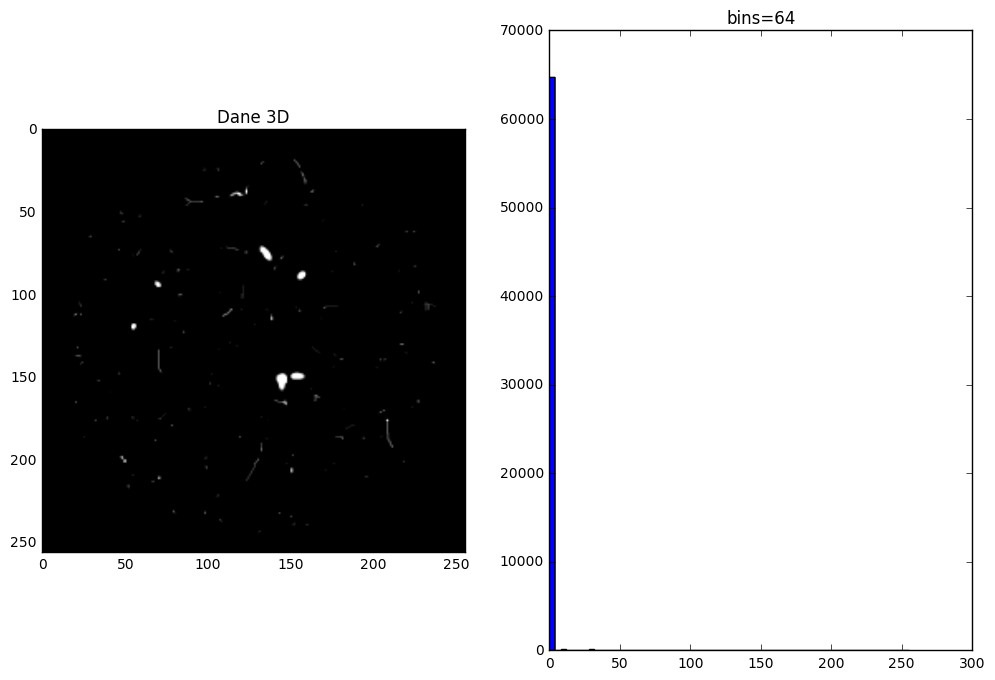

In [8]:
poigk2.img_hist(im_data[:,:,128],title="Dane 3D")

Wyświetl 16 przekrojów wczytanego obrazu 3D poczynając od $48 \div 198$ (włącznie) z krokiem co $10$. W tym celu zastosuj pętlę *for*.

Zmodyfikuj procedurę wyświetlania tak, aby z każdego wyświetlanego przekroju wyświetlić środek obrazu, np. prostokąt $100\times150$ pikseli.

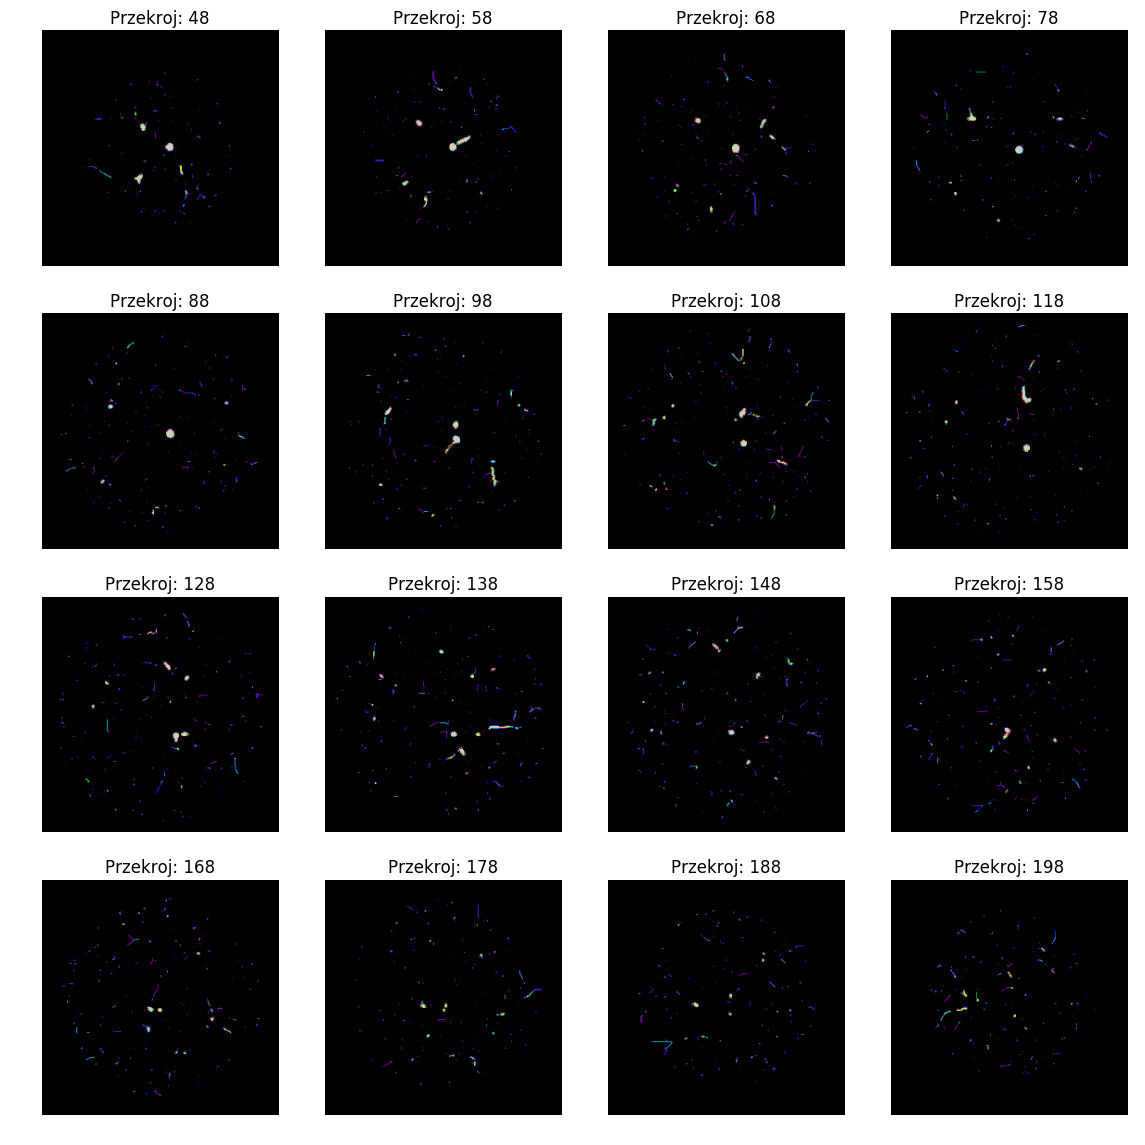

In [9]:
plt.figure(figsize=(14,14))
for i,idx in enumerate(range(48,200,10)):
    plt.subplot(4,4,i+1)
    plt.imshow(im_data[:,:,idx],cmap='spectral')
    plt.title('Przekroj: %d'%idx)
    plt.axis('off')
plt.show()

Sprawdz ktore z poprzednio napisanych funkcji zadzialają na obrazach 3D? Wyjaśnij dlaczego. Zastanów się czy i ewentualnie jak trzeba zmodyfikować kody poszczególnych funkcji aby działały dla danych 3D:
1. imginfo
1. funkcje do progowania,
1. funkcje do wyswietlaniae obrazów,
1. inwersja poziomów jasności,
1. zmiana zakresu jasności w obrazie (reskalowanie),
1. wyświetlanie histogramów.

#### 6. Rzutowanie największej jasności (*Maximum Intensity Projection - MIP*)

[Rzutowanie największej jasności](https://en.wikipedia.org/wiki/Maximum_intensity_projection) jest jednym ze sposobów wizualizacji danych 3D na płaszczyźnie. Wykorzystując operacje macierzowe jest ono bardzo proste do wykonania. Parametra *axis* określa oś względem której liczona jest wartość maksymalna obrazu 3D.

In [10]:
im1 = im_data.max(axis=0)
im2 = im_data.argmax(axis=0)

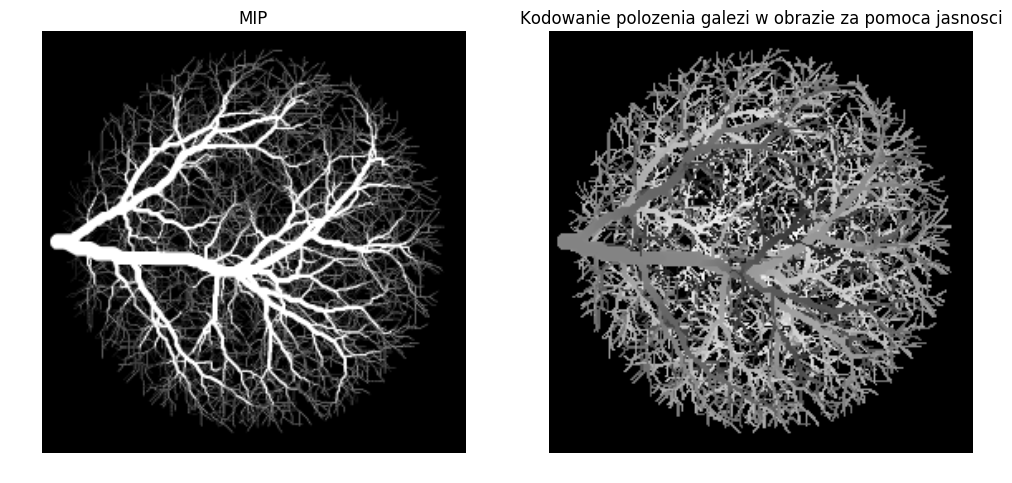

In [11]:
poigk1.imshow2([im1,im2],titles=['MIP','Kodowanie polozenia galezi w obrazie za pomoca jasnosci'],show_axis='off')

#### 7. Interaktywana wizualizacja obrazu 3D

Do tego zadania wykorzystaj przykład z przedmiotu *Podstawy programowania* dotyczący interakcyjnego wyboru wyświetlanego przekroju obrazu 3D z wykorzystaniem suwaka. Program napisano z wykorzystaniem biblioteki *matplotlib*.

**Zadanie od wykonania w domu.** Do interfejsu graficznego dodaj przycisk *MAX* po wciśnięciu kórego będzie wyświetlane rzutowanie największej jasności.

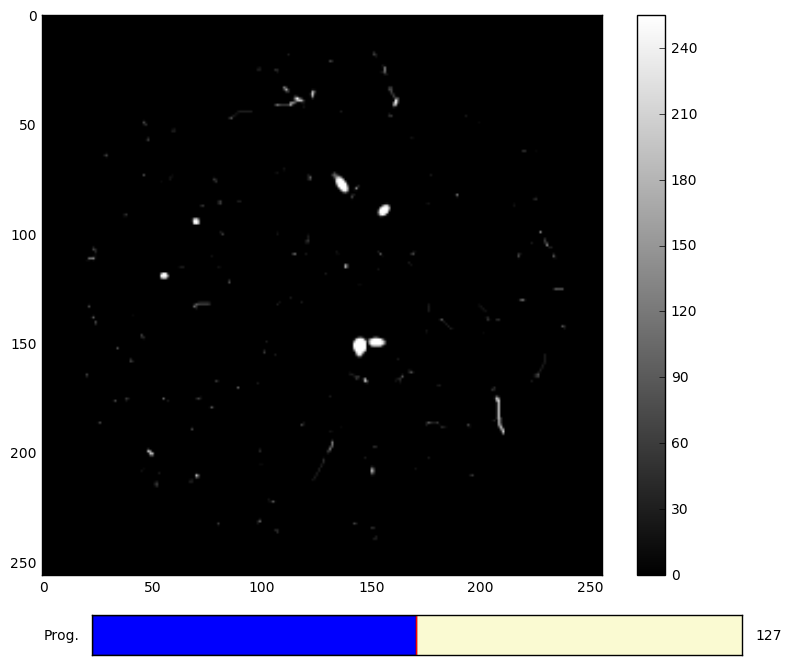

In [12]:
# %load poigk_lab5_obraz_3d_przekroje.py
# Lab 9 - 2015
# Matplotlib - Graficzny interfejs użytkownika 2- biblioteka Matplotlib
# (c) Marek Kocinski & Anna Borowska-Terka

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

img = nib.load(os.path.join('lab5_dane','normal01.nii.gz')).get_data()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.2,bottom=0.2)

im = ax.imshow(img[:,:,127],cmap='gray')
fig.colorbar(im)

slidercolor = 'lightgoldenrodyellow'
slideraxes = fig.add_axes([0.25, 0.1, 0.65, 0.05], axisbg=slidercolor)

slider = Slider(slideraxes, 'Prog.', 0, 255, valinit=127, valfmt='%d')

def update(val):
    im.set_array(img[:,:,val])
    #fig.canvas.draw()

slider.on_changed(update)

plt.show()

#### 8. Progowanie obrazu 3D i zapis do pliku NIFTI

Przeprowadź operację progowania obrazu 3D dla następujących warości progów $ th=\{1,50,100,150,200\}$; następnie zapisz obrazy na dysk do plików NIFTI z rozszerzeniem *nii.gz.*.

In [13]:
import time
def copyniftiheader(data,niftioriginal):
    """
    Tworzy obraz nifti z przepisaniem informacji naglowkowych z obrazu oryginalnego.

    (C) MKocinski & AMaterka
    U:14.02.2014
    M:15.02.2014
    """
    hdr = niftioriginal.get_header()
    hdr['descrip'] = 'angio3d-nibabel-' + nib.__version__ + 'by MK ({})'.format(time.strftime("%Y-%m-%d"))

    img = nib.Nifti1Image(data, affine=niftioriginal.get_affine(), header=hdr)
    img.set_data_dtype(data.dtype.name)
    return img

In [14]:
thresh = [1,50,100,150,200,250]
for th in thresh:
    hdr = nib.load(os.path.join('lab5_dane','normal01.nii.gz'))
    data = hdr.get_data()
    data2 = np.where(data>th,255,0)
    data2 = np.asarray(data2,np.uint8)
    hdr2 = copyniftiheader(data2,hdr)
    hdr2.to_filename(os.path.join('lab5_dane','normal01_th-{:0>3}.nii.gz'.format(th)))

#### 9. Model 3D drzewa naczyń krwionośnych odwzorowanego w obrazie 3D

Z wykorzystaniem kodu zamieszczonego poniżej zbuduj i wyświetl w osobnym oknie trójwymiarowy model syntetycznego drzewa naczyń krwionośnych. Poniższy kod jest napisany z wykorzystaniem funkcji z biblioteki *Visualization Toolkit* [VTK](www.vtk.org). Biblioteka ta zawiera dużą liczbę gotowych funkcji do wydzielania, modelowania i wuzualizacji trójwymiarowych obiektów, a także podstawowe funkcje przetwarzanie obrazu. Głównym elementem przedstawionego kodu jest zbudowanie powierzchni naczyń krwionośnych za pomocą goteowej funkcji *vtkMarchingCubes()* opartej na algorytmie o takiej samej nazwie ([1](https://en.wikipedia.org/wiki/Marching_cubes),[2](https://pl.wikipedia.org/wiki/Algorytm_maszerujących_sześcianów)).

W kodzie dodano możliość zapisania wydzielonej geometrii do plików *STL* lub *VTK*. Wyboru można dokonać w lini 84. Warość jasności którą chcemy zamienić na pwierzchnię i zwizualizować przechowywana jest w zmiennej *isovalue* (linia 45).
Nazwa pod jaką zpisywany jest plik jest określana w lini 97. Wyświetl i zapisz geomterię dla wartości zmiennej $isovalue=\{1,50,100,150,200,250\}$. Porównaj wyniki i wyjaśnij różnice.

In [15]:
# %load poigk_lab5_marching_cubes_3D_with_STL_save.py
#####################################
### Lodz University of Technology ###
### Institute of Electronics      ###
### Image Processing and          ###
### Computer Graphics             ###
### Marek Kocinski                ###
### 2014                          ###
#####################################
import os
import nibabel as nib

import vtk
print(vtk.vtkVersion.GetVTKSourceVersion())
#print os.getcwd()

imageArray = nib.load(os.path.join('lab5_dane','normal01.nii.gz')).get_data()

# aby moc wyswietlic obraz trzeba go zamienic na format vtk-owy
dataImporter = vtk.vtkImageImport()                               
# obraz jest zamieniany na string zbudowany z charow...
data_string = imageArray.tostring()                               
# ... i wrzucany do dataImportera     
dataImporter.CopyImportVoidPointer(data_string, len(data_string)) 
# informujemy VTK ze dane sa charami...
dataImporter.SetDataScalarTypeToUnsignedChar()                    
# ... ze jasnosci sa kodowane przy pomocy jednej tablicy (nie jak w rgb 3)
dataImporter.SetNumberOfScalarComponents(1)                       
 # podajemy rozmiar danych (cos jak wczytywanie raw)...
dataImporter.SetDataExtent(0,(imageArray.shape[2]-1),0,(imageArray.shape[1]-1), 0,(imageArray.shape[0]-1))
# ...mmusimy to zrobic bo podalismy przeciez stringa a nie tablice
dataImporter.SetWholeExtent(0,(imageArray.shape[2]-1),0,(imageArray.shape[1]-1),0,(imageArray.shape[0]-1)) 

shrinker = vtk.vtkImageShrink3D()
shrinker.SetInputConnection(dataImporter.GetOutputPort())
shrinker.SetShrinkFactors(1,1,1)
shrinker.AveragingOn()

gaussian = vtk.vtkImageGaussianSmooth()
gaussian.SetDimensionality(3)
gaussian.SetStandardDeviations(1.0, 1.0, 1.0)
gaussian.SetRadiusFactor(1.0)
gaussian.SetInputConnection(shrinker.GetOutputPort())

isovalue = 50
marching = vtk.vtkMarchingCubes()
marching.SetInputConnection(gaussian.GetOutputPort())
marching.SetValue(1,isovalue)
marching.ComputeScalarsOff()
marching.ComputeGradientsOff()
marching.ComputeNormalsOff()

decimator = vtk.vtkDecimatePro()
decimator.SetInputConnection(marching.GetOutputPort())
decimator.SetTargetReduction(0.1)
decimator.SetFeatureAngle(60)

smoother = vtk.vtkSmoothPolyDataFilter()
smoother.SetInputConnection(decimator.GetOutputPort())
smoother.BoundarySmoothingOn()
smoother.FeatureEdgeSmoothingOn()

normals = vtk.vtkPolyDataNormals()
normals.SetInputConnection(smoother.GetOutputPort())
normals.SetFeatureAngle(60)

stripper = vtk.vtkStripper()
stripper.SetInputConnection(normals.GetOutputPort())

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(stripper.GetOutputPort())
mapper.ScalarVisibilityOff()

surf = vtk.vtkProperty()
surf.SetColor(0.8,0.1,0.1)

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.SetProperty(surf)

ren1 = vtk.vtkRenderer()
ren1.AddActor(actor)

fileType   = "stl"                                                   
if ( fileType == "vtk" ):
    writer = vtk.vtkPolyDataWriter()  
elif ( fileType == "stl" ):
    writer = vtk.vtkSTLWriter()
else: 
    print "[ERROR] Wrong file format. You can use vtk or stl"
    
if vtk.VTK_MAJOR_VERSION <= 5:
    writer.SetInputConnection( normals.GetOutput() ) 
else:
    writer.SetInputConnection( normals.GetOutputPort() )                             

filename = "normal01_vtk_iso{:03d}.{}".format(50,fileType)  
writer.SetFileName( filename ) 
writer.Write()       

renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren1)

iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

renWin.Render()
iren.Start()

def close_window(iren):
    render_window = iren.GetRenderWindow()
    render_window.Finalize()
    iren.TerminateApp()
# w razie problemow z dzialaniem programu
# odkomentuj/zakomentuj ponizsze linie
# w zaleznosci od systemu operacyjnego
# lub wersji zainstalowanych bibliotek 
# moga pojawic sie problemu w prawidlowym
# zakonczeniu dzialania programu    
#close_window(iren)
#del renWin, iren

vtk version 7.0.0


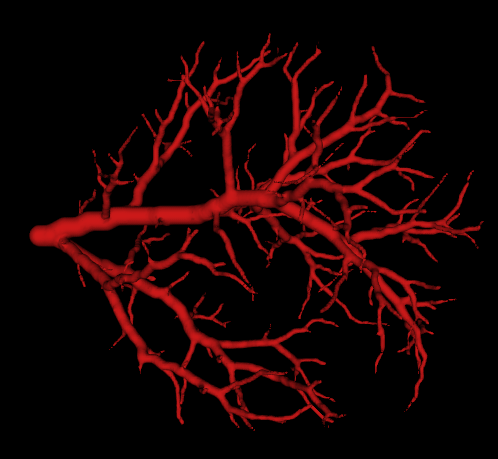

In [16]:
vtk_model

---

#### 10. Program FIJII - pliki 3D w formacie NIFTI

Otwórz progam ImageJ-Fiji i zaimportuj trójwymiarowy obraz *normal01.nii.gz* (File->Import->Nifti...) lub (File->Import->Bio-Formats). Wyświetli się obraz w okinie z suwakiem za pomocą którego można przeglądać kolejne przekroje.

Sprawdź opcje dotyczące obrazów 3D (przycisk *Stk* w palecie przycisków):
1. Z project,
1. 3D project,
1. start/stop animation,
1. oraz pozostałe opcje.

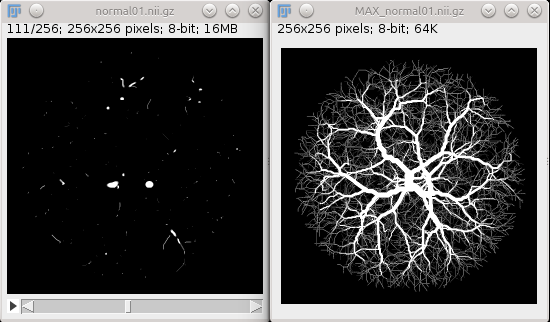

In [17]:
imagej_slices

#### 11. Dane obrazowe 3D

W katalogu z danymi oprócz obrazu z odzwozorowanym syntetycznym drzewem naczyń krwionośnych znajdują się dodatkowe (przetworzone) obrazy. Są to trójwymiarowe obrazy rastrowe po progowaniu (dla $th={1,50,100,150,200,250}$) oraz odpowiadające im obrazy i trójwymiarowe modele szkieletów (*skel.nii.gz*). Dla każdej wartości progu jest taki sam zestaw plików (po 3 pliki).

Do analizy obrazów rastrowych tym razem wykorzystamy program [ITK-SNAP](http://www.itksnap.org), natomiast trójwymiarowe modele będziemy przeglądać w programie [Paraview](http://www.paraview.org).

|       Nazwa pliku           |                  Krótki opis                   |  Program do wizualizacji |
|:---------------------------:|:----------------------------------------------:|:------------------------:|
| normal01.nii.gz             | obraz rastrowy 3D                                 | ITK-SNAP |
| normal01_th-001.nii.gz      | obraz 3D po progowaniu $th=1$                     | ITK-SNAP |
| normal01_th-001_skel.nii.gz | obraz 3D szkieletu dla progu $th=1$               | ITK-SNAP |
| normal01_th-001_skel.stl    | trójwymiarowy model szkieletu dla progu $th=1$    | Paraview |


Jednym z kolejnych zadań będzie wykonanie segmentacji obrazu sprogowanego (dla wszystkich wartości progów), a następnie zapisanie obrazu wynikowego jako obrazu rastrowego (*segm.nii.gz*) i modelu powierzchni (*_segm.stl*).

|       Nazwa pliku           |                  Krótki opis                         |  Program do wizualizacji |
|:---------------------------:|:---------------------------------------------------------:|:-----------:|
| normal01_th-001_segm.nii.gz | obraz 3D po progowaniu $th=1$ i po segmentacji            | ITK-SNAP |
| normal01_th-001_segm.stl    | powierzchnia naczyń po progowaniu $th=1$ i po segmentacji | Paraview |

#### 12. Wizualizacja obrazów 3D - program ITK-SNAP

Otwórz obraz *normal01.nii.gz* w programi ITK-SNAP. Zapoznaj się opcjami w menu Tools->Layer Inspector... (Ctrl+i)
1. zmień kontrast,
1. sprawdź jak działa funkcja automatycznego doboru kontrastu,
1. zmień mapę kolorów,
1. wysietl pojedynczy widok na ekranie (nie cztery tak jak jest domyślnie).

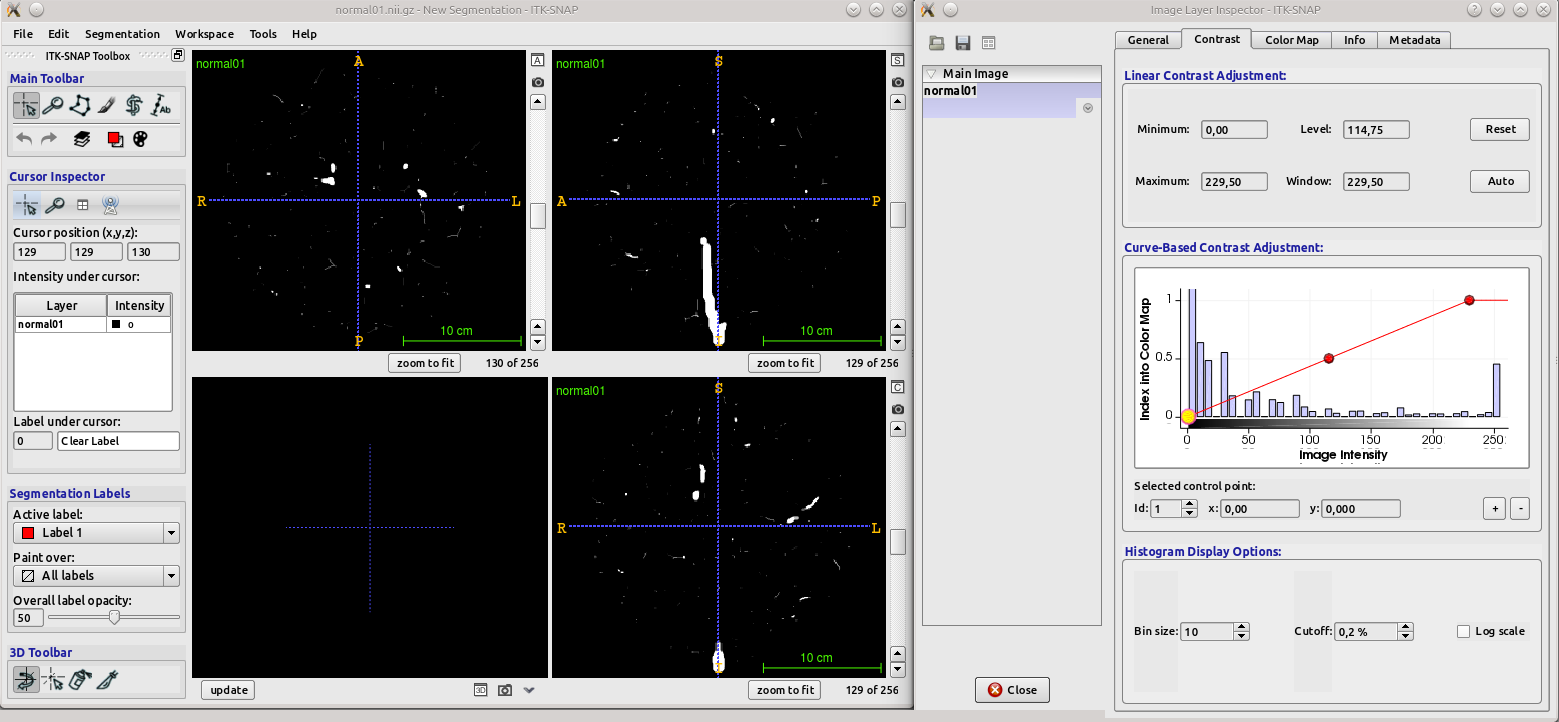

In [18]:
itksnap1

Wczytaj dodatkowy obraz (np. *normal01_th-001_skel.nii.gz*) i zaobserwuj różnice. File->Add Another Image ... -> Wybierz obraz z pliku -> Next -> Wybierz: As a semi-transparent overlay -> Next -> Finish.

Można przełączać się pomiędzy widokami obu obrazów za pomocą suwaka umieszczonego w zakładce *Contrast* okna *Image Layer Inspector (CTRL+I*).

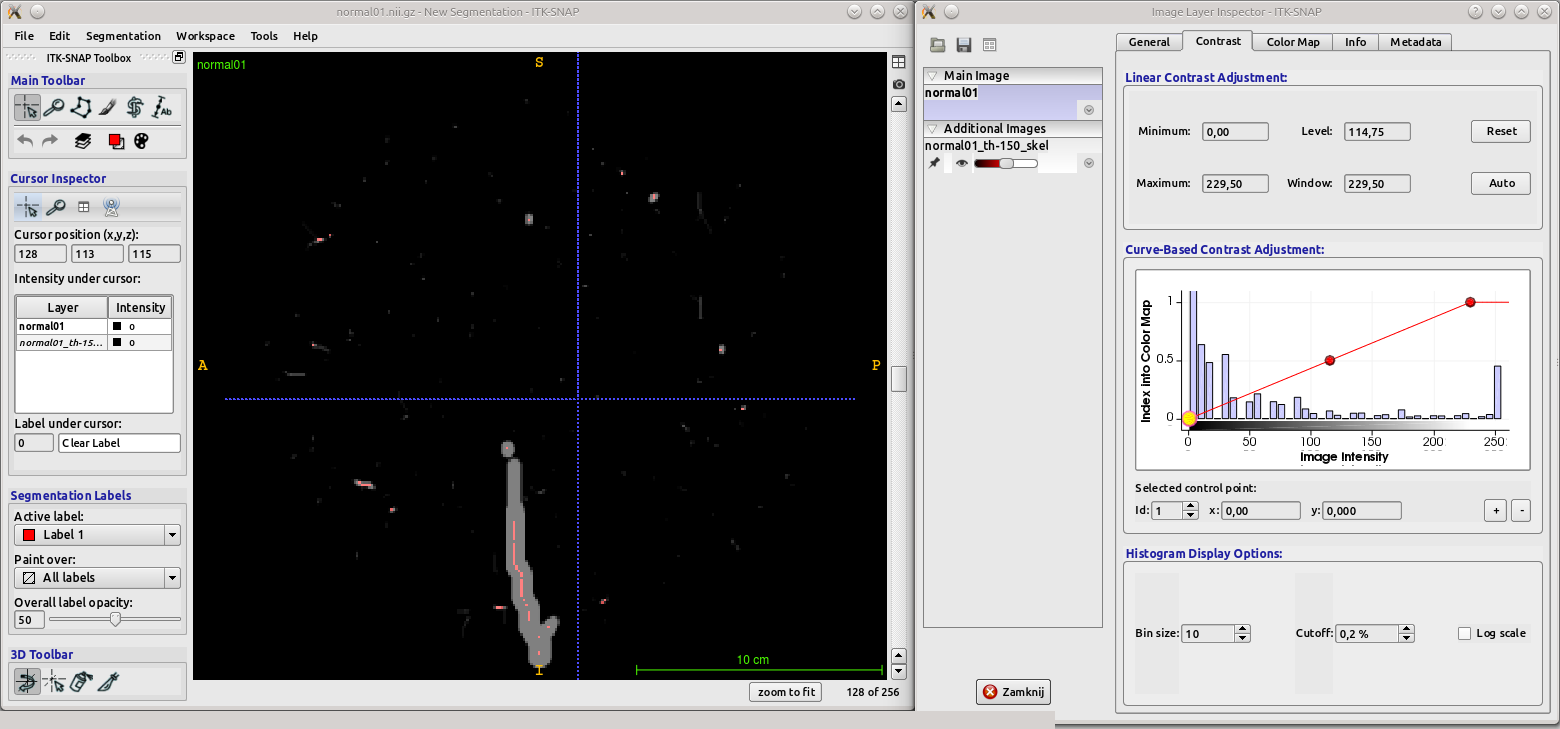

In [19]:
itksnap2

#### 13. Segmentacja z wykorzystaniem programu ITK-SNAP

Wczytaj dowolny obraz po progowaniu np. *normal01_th-100.nii.gz*. Przeprowadź proces segmentacji sprogowanego obrazu (według wskazówek prowadzącego zajęcia). Rezultaty zapisz jako obrazy: rastrowy *normal01_th-100_segm.nii.gz* oraz jako model powierzchni *normal01_th-100_segm.stl*. Powtórz zadanie dla obrazów ze wszystkimi wartościami progu *th*.

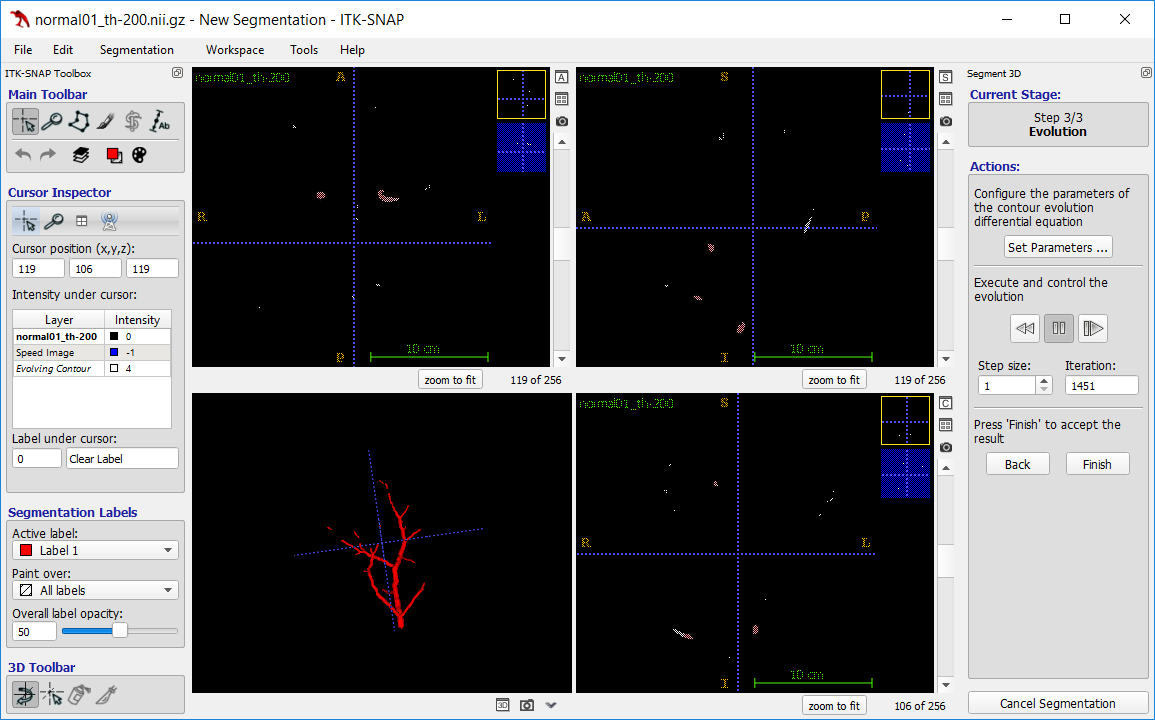

In [20]:
itksnap3

#### 14. Wizualizacja modeli 3D w programie Paraview

Wyświetl jednocześnie kilka modeli geometrycznych:
1. powierzczhnię drzewa naczyń krwinośnych i odpowiadający jej model szkieletu dla danej wartości progu th,
1. pwierzczhnię drzewa naczyń dla różnych wartości progów *th*,
1. modele szkieletów dla różnych wartości progów *th*,
1. można również wyświetlić przekrój obrazy oryginalnego *normal01.nii.gz* jednak trzeba go zapisać (w ITK-SNAP) jako obraz *normal01.vtk*.

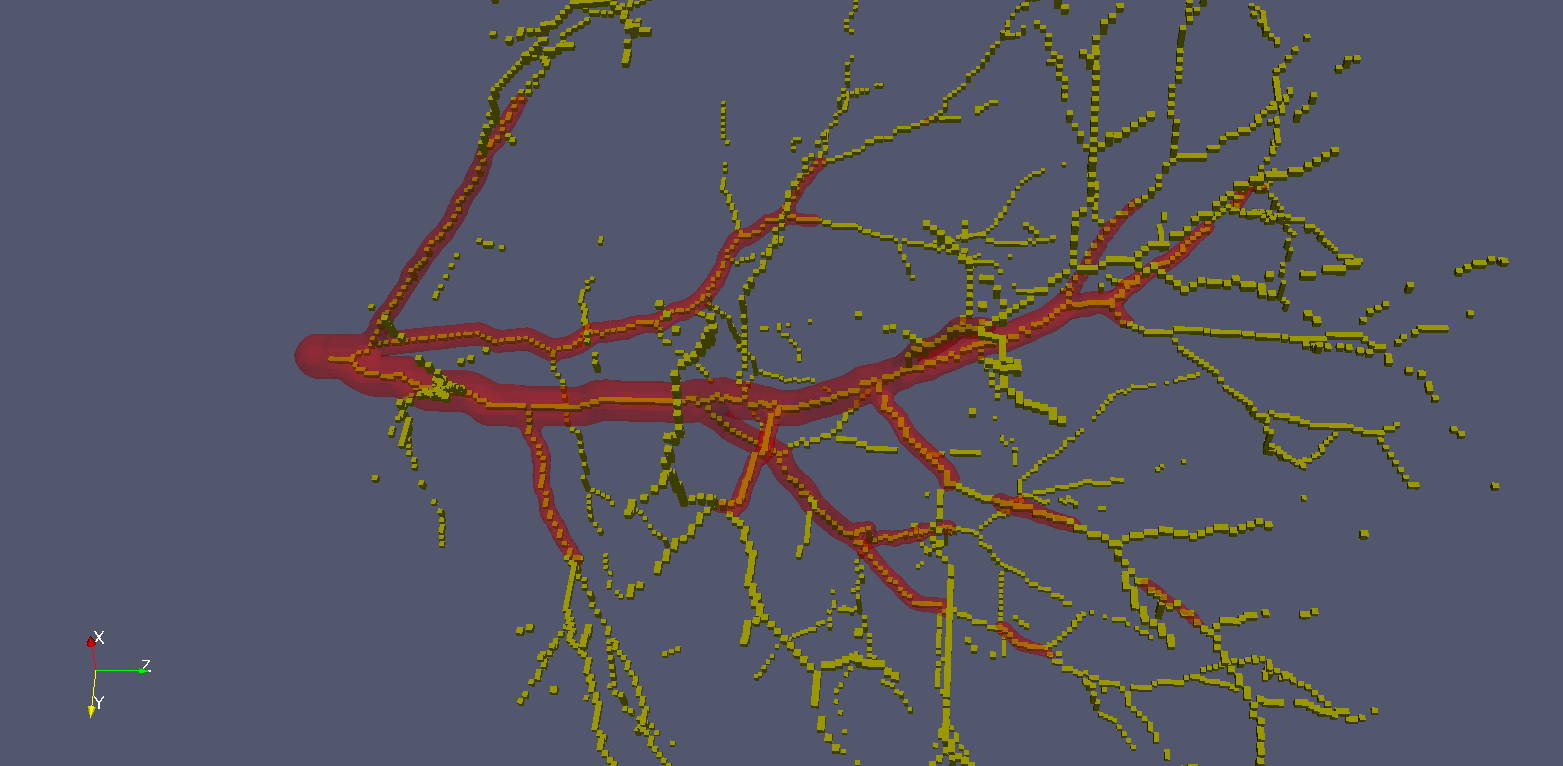

In [21]:
paraview

#### Ostatnia aktualizacja: 09.04.2017 r.